In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("/Users/william/Desktop/Covid Project/finalDataCleanedNormalized.csv")
df.rename(columns = {'DATE_DIED':'DEATH'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76749 entries, 0 to 76748
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MEDICAL_UNIT          76749 non-null  float64
 1   PATIENT_TYPE          76749 non-null  float64
 2   PNEUMONIA             76749 non-null  float64
 3   AGE                   76749 non-null  float64
 4   DIABETES              76749 non-null  float64
 5   RENAL_CHRONIC         76749 non-null  float64
 6   DEATH                 76749 non-null  float64
 7   CLASIFFICATION_FINAL  76749 non-null  float64
 8   ICU                   76749 non-null  float64
dtypes: float64(9)
memory usage: 5.3 MB


In [4]:
X = df[['MEDICAL_UNIT','PATIENT_TYPE','PNEUMONIA','AGE','DIABETES','RENAL_CHRONIC','CLASIFFICATION_FINAL','ICU']] 
y = df[['DEATH']]

In [5]:
#divide data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#normalize data
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [6]:
StandardScaler()

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, np.ravel(y_train,order='C'))


KNeighborsClassifier(n_neighbors=10)

In [14]:
k_range = range(1, 40)
k_range = range(1, 40)

#Creating a Python dictionary by [] and then appending the accuracy scores
scores = []

    #looping through the range 1 to 40
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,np.ravel(y_train,order='C'))
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))


Text(0, 0.5, 'Testing Accuracy')

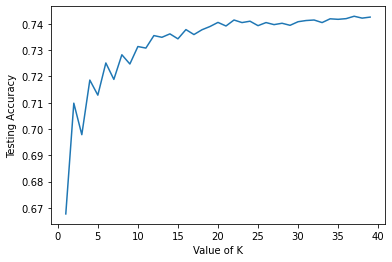

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel('Testing Accuracy')



In [54]:
from sklearn.decomposition import PCA


In [33]:
#final k-NN model

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, np.ravel(y_train,order='C'))

y_pred = classifier.predict(X_test)

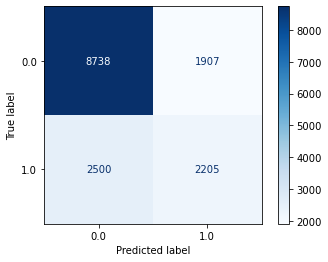

In [37]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import seaborn as sns